# cellpose segmentation features(  area, perimeter, centroid )

In [1]:
import cv2 
# read image
img = cv2.imread('Cellpose_prediction_masks.png', cv2.IMREAD_UNCHANGED)
img.shape
mask = img[:,:,2]
#mask = img

Populating the interactive namespace from numpy and matplotlib


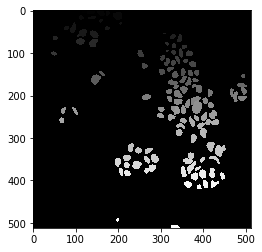

In [2]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('Cellpose_prediction_masks.png')
imgplot = plt.imshow(img[:,:,2],cmap='gray')
plt.show()

In [3]:
# CellPose code 
from cellpose import models
from cellpose.plot import mask_overlay
import numpy as np
import pandas as pd
import os
import sys 
from sys import platform

def get_blob_prop(msk):
  contours,hierarchy = cv2.findContours(msk, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
  for cnt in contours:
    try:
      m = cv2.moments(cnt)
      x = m['m10']/m['m00']
      y = m['m01'] /m['m00']
      area = cv2.contourArea(cnt)
      perimeter = cv2.arcLength(cnt,True)
    except:
      print('Trying to find moment of image')
      continue  
    return {'centroid':(x,y),'area':area,'perimeter':perimeter}

2021-11-22 12:09:21,646 [INFO] WRITING LOG OUTPUT TO /ihome/zsiddiqu/singhp/.cellpose/run.log


In [4]:
#get count in pandas dataframe, to be saved to csv
def get_count2csv(list_of_cells_props):
    df = pd.DataFrame()
    df['centroid'] = [i['centroid'] for i in list_of_cells_props]
    df['area'] = [i['area'] for i in list_of_cells_props]
    df['perimeter'] = [i['perimeter'] for i in list_of_cells_props]
    return df

In [5]:
        list_of_cells_props = []
        for i in range(mask.max()):
            msk =(mask == i+1)*255
            #msk = msk[100:1200,100:1900]
            msk = msk[100:1200,100:1900]
            nzCount = cv2.countNonZero(msk)
            if(nzCount > 0):
              prop_dict = get_blob_prop(msk.astype(np.uint8))
              if prop_dict:
                list_of_cells_props.append(prop_dict)
        df = get_count2csv(list_of_cells_props)
        df.head(50)

,centroid,area,perimeter
0,"(230.2608695652174, 1.7777777777777777)",34.5,27.071068
1,"(247.96502057613165, 4.833333333333333)",81.0,36.485281
2,"(266.95588235294116, 3.2761437908496727)",102.0,42.485281
3,"(152.46861924686192, 4.7364016736401675)",119.5,42.727922
4,"(204.02006172839504, 11.751543209876543)",108.0,41.798990
5,"(239.92866407263293, 15.942931258106354)",128.5,50.041630
6,"(257.94375, 19.510416666666664)",80.0,34.970562
7,"(214.59213250517595, 22.030020703933747)",161.0,55.455844
8,"(228.93492695883134, 23.624169986719785)",125.5,43.213203
9,"(275.09485815602835, 26.694148936170212)",188.0,52.627417
